# Import libraries and data

In [2]:
import sys
sys.path.append('..')
import re

In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.load_data import load_dataset
import shap
import seaborn as sns
root_path="C://Users//noemi//Desktop//university//university//tesi/Thesis-XAI/"

In [6]:
with open(root_path+"X_train.pkl", 'rb') as f:
    X_train = pickle.load(f)
with open(root_path+"X_test.pkl", 'rb') as f:
    X_test = pickle.load(f)
with open(root_path+"y_train.pkl", 'rb') as f:
    y_train = pickle.load(f)
with open(root_path+"y_test.pkl", 'rb') as f:
    y_test = pickle.load(f)

# XRT with background data set to tree path dependent

## Variance Only Among Patients:
1. mean and variance are computed for each patient, for each class considering all instances
2. The mean of each patient is averaged among patient and the same for the variance

In [ ]:
# VARIANCE ONLY BETWEEN PATIENT
num_pat=11
shap_extratrees=[]
shap_means=[]
shap_variances=[]
for pat in range(num_pat):
    file_path = 'C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(pat)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_extratrees.append(shap_values)
    shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
    shap_variance=pd.DataFrame(columns=shap_values[0].columns.values)
    for i in range(8):
        tmp=shap_values[i].abs()
        shap_mean.loc[i]=tmp.mean(axis=0)
        shap_variance.loc[i]=tmp.var(axis=0)
    shap_means.append((shap_mean))
    shap_variances.append(shap_variance)

In [ ]:
print(len(shap_extratrees))
print(len(shap_extratrees[0]))
print(shap_extratrees[0][0].shape)
print(len(shap_means))
print(shap_means[0].shape)
print(shap_means[0]["HP_M1"])
print(shap_means[0]["RMS7"])
print(len(shap_variances))
#print(shap_variance_patients[0])

In [170]:
mean_shap=sum(shap_means)/len(shap_means)
var_shap=sum((i - mean_shap) ** 2 for i in shap_means) / len(shap_means) 
#print(mean_shap.head())
#print(var_shap.head())
print(mean_shap.max)

<bound method DataFrame.max of        MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0  0.005210  0.006086  0.001670  0.006356  0.002022  0.002258  0.006134   
1  0.002997  0.002188  0.002612  0.009308  0.005427  0.002333  0.003200   
2  0.002538  0.004382  0.001831  0.003806  0.002473  0.004012  0.003717   
3  0.003075  0.008421  0.003123  0.005161  0.005072  0.006175  0.002967   
4  0.005809  0.004074  0.002434  0.006765  0.003592  0.005521  0.004524   
5  0.004699  0.004753  0.002412  0.003954  0.003609  0.008298  0.005354   
6  0.004472  0.003434  0.002492  0.004655  0.003814  0.006973  0.004224   
7  0.002954  0.002625  0.001572  0.004636  0.003030  0.009881  0.007283   

       MAV8      MAV9     MAV10  ...     IEMG1     IEMG2     IEMG3     IEMG4  \
0  0.006056  0.004170  0.003837  ...  0.005371  0.006600  0.001759  0.006317   
1  0.002928  0.008095  0.003274  ...  0.002505  0.002115  0.003664  0.011789   
2  0.004925  0.005412  0.002640  ...  0.002456  0.004

## Variance and mean computed among all instances and all patient
e.g. class 1: all instances of patients from 0 to 10 are averaged together and the overall variance is computed. the mean it is the same as before (averaging firstly among instances and then patient or all together is the same) instead the variance is considerably higher since it takes into consideration also the internal variance among instances

### import shap data and append them together

In [39]:
num_pat=11
shap_extratrees=[]
for pat in range(num_pat):
    file_path = root_path+'resources/SHAP/SHAP_EXTRA/shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(pat)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_extratrees.append(shap_values)
    

For each class compute mean and variance: output: 8x90 (8 classes 90 features)

In [40]:
shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
shap_variance=pd.DataFrame(columns=shap_values[0].columns.values)
for i in range(8):
    shap_tmp=pd.DataFrame(columns=shap_values[0].columns.values)

    for pat in range(num_pat):
        shap_tmp=pd.concat([shap_tmp, shap_extratrees[pat][i].abs()], axis=0)

    shap_mean.loc[i]=shap_tmp.mean(axis=0)
    shap_variance.loc[i]=shap_tmp.var(axis=0)
    #shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
        #tmp=shap_values[i].abs()
        #shap_mean.loc[i]=tmp.mean(axis=0)
        #shap_variance.loc[i]=tmp.var(axis=0)
    #shap_means.append((shap_mean))
    #shap_variances.append(shap_variance)
shap_mean

,MAV1,MAV2,MAV3,MAV4,MAV5,MAV6,MAV7,MAV8,MAV9,MAV10,...,IEMG1,IEMG2,IEMG3,IEMG4,IEMG5,IEMG6,IEMG7,IEMG8,IEMG9,IEMG10
0,0.005220,0.006117,0.001669,0.006361,0.002036,0.002257,0.006122,0.006040,0.004153,0.003855,...,0.005348,0.006649,0.001752,0.006318,0.002298,0.002107,0.006400,0.006148,0.004279,0.004074
1,0.002953,0.002196,0.002613,0.009319,0.005418,0.002337,0.003199,0.002921,0.008130,0.003272,...,0.002495,0.002133,0.003672,0.011782,0.005310,0.003041,0.003129,0.002804,0.010231,0.003419
2,0.002540,0.004389,0.001821,0.003800,0.002467,0.003988,0.003704,0.004940,0.005415,0.002650,...,0.002443,0.004440,0.002070,0.005432,0.002846,0.004187,0.003406,0.004313,0.007136,0.002893
3,0.003086,0.008467,0.003127,0.005152,0.005073,0.006143,0.002956,0.004688,0.004681,0.003134,...,0.003488,0.008908,0.003761,0.005032,0.005263,0.007042,0.002801,0.004076,0.004687,0.003061
4,0.005787,0.004074,0.002423,0.006714,0.003591,0.005530,0.004526,0.003959,0.008864,0.007074,...,0.005220,0.004900,0.003132,0.006780,0.003775,0.006486,0.005021,0.004088,0.008846,0.007885
5,0.004696,0.004768,0.002411,0.003942,0.003610,0.008242,0.005364,0.003910,0.004388,0.006134,...,0.004819,0.004437,0.002778,0.003955,0.003719,0.007998,0.005916,0.003507,0.005115,0.005249
6,0.004489,0.003428,0.002485,0.004610,0.003808,0.006921,0.004238,0.003178,0.004462,0.003943,...,0.004310,0.003936,0.002907,0.004433,0.003748,0.005488,0.004766,0.002991,0.005102,0.003774
7,0.002947,0.002639,0.001576,0.004631,0.003051,0.009873,0.007246,0.007089,0.005529,0.003842,...,0.003235,0.002902,0.002016,0.004884,0.003681,0.009547,0.006729,0.007734,0.005867,0.004268


Group features by typology or channel

In [26]:
feature=shap_mean.columns.values.copy()
channel=shap_mean.columns.values.copy()
for index in range(len(feature)):
    feature[index]=''.join([i for i in feature[index] if not i.isdigit()])
    channel[index]=''.join([i for i in channel[index] if i.isdigit()])
print(feature)
print(channel)

['MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'MAV' 'ZC' 'ZC'
 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'ZC' 'SSC' 'SSC' 'SSC' 'SSC' 'SSC'
 'SSC' 'SSC' 'SSC' 'SSC' 'SSC' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL' 'WL'
 'WL' 'WL' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A' 'HP_A'
 'HP_A' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M' 'HP_M'
 'HP_M' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C' 'HP_C'
 'HP_C' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'RMS' 'IEMG'
 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG' 'IEMG']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8'
 '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4'
 '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' '10' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10']


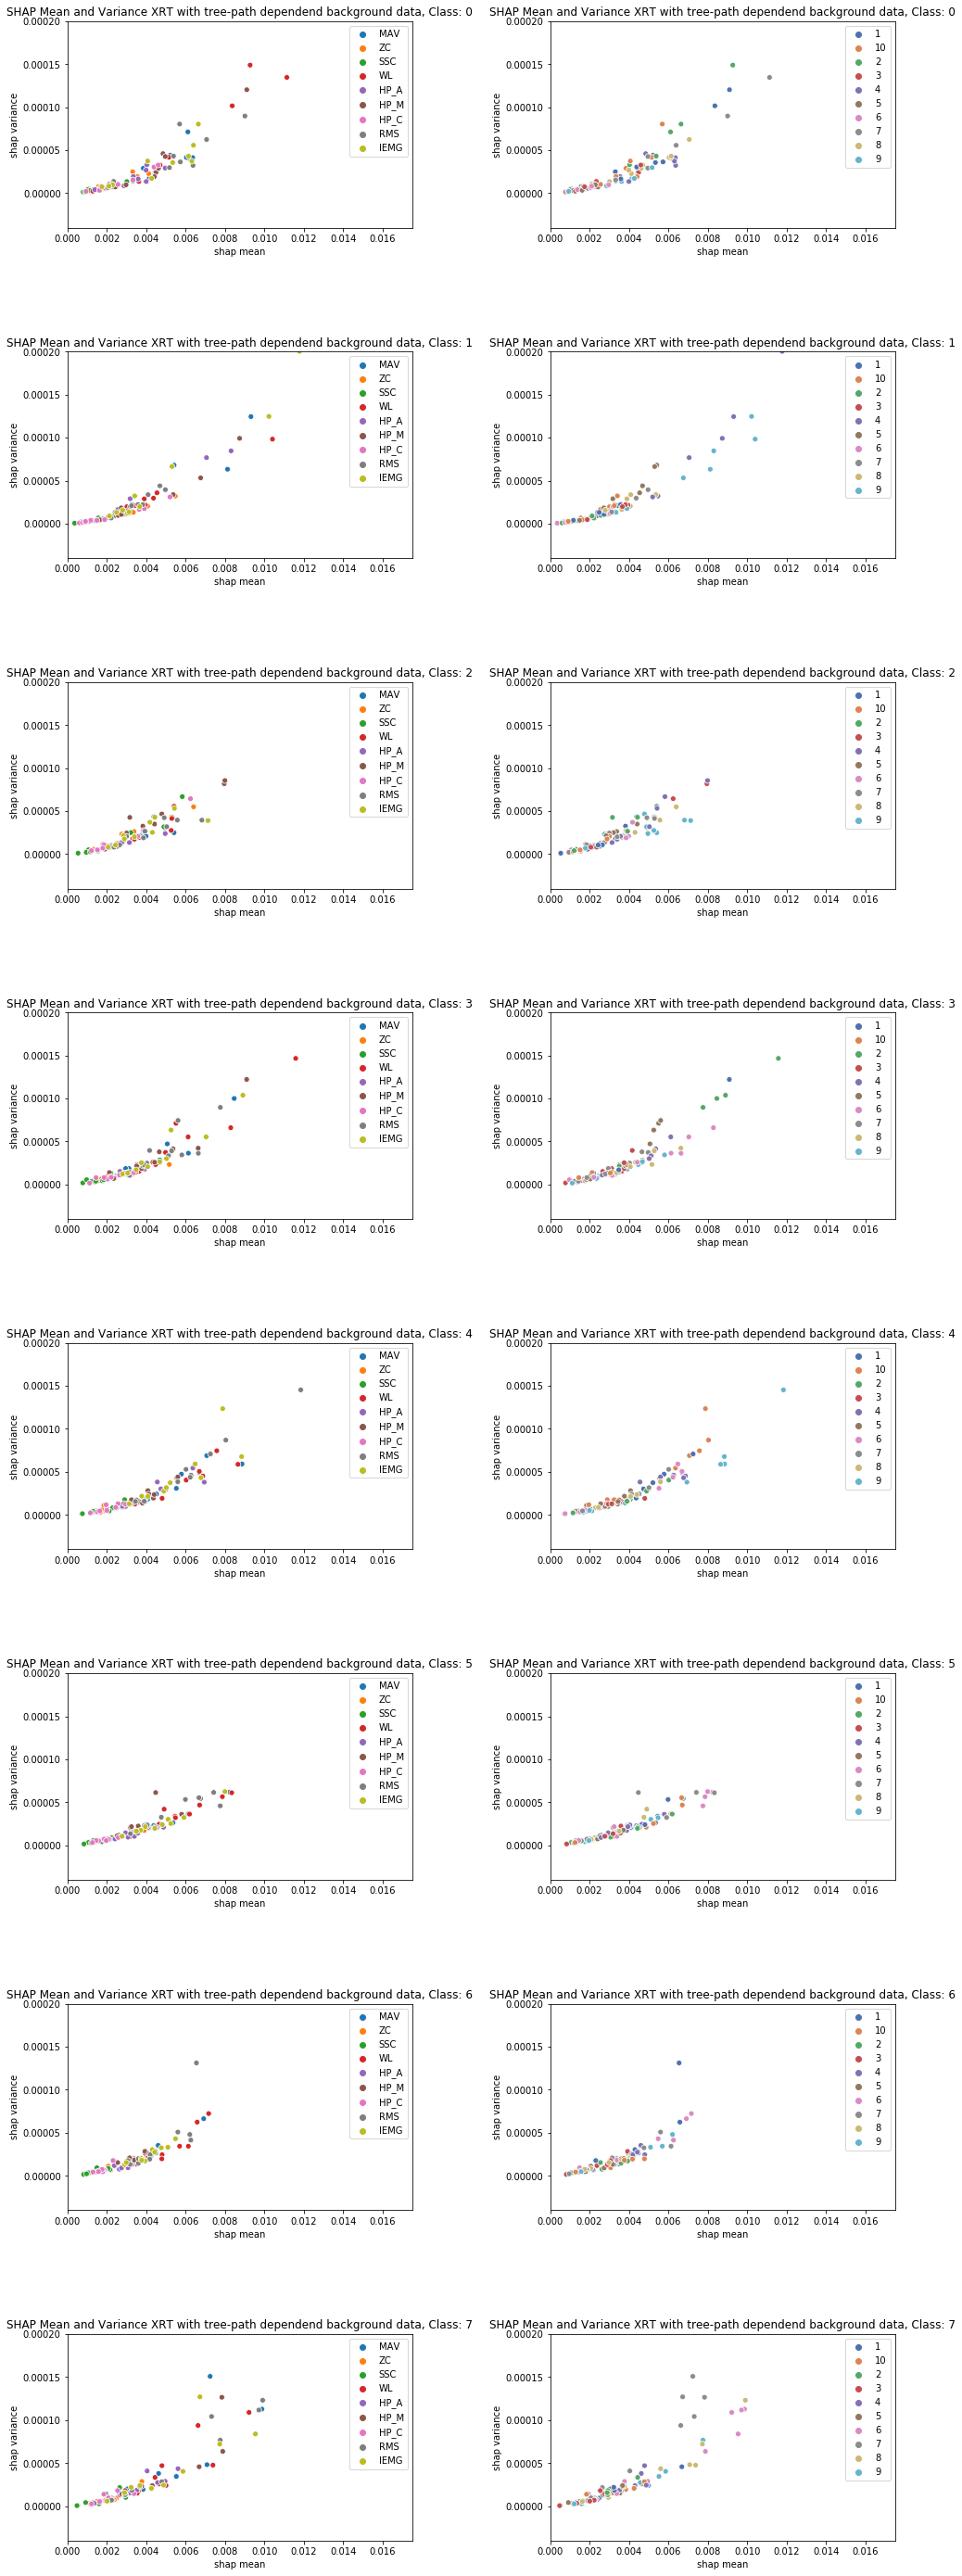

In [30]:
heigth=8;
width=2;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    sns.scatterplot(x=shap_mean.iloc[i], y=((shap_variance.iloc[i])), hue=feature, legend="full", ax=axes[i,0])
    axes[i,0].set(ylim=(-0.00004, 0.0002))
    axes[i,0].set(xlim=(0,0.0175))
    axes[i,0].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,0].set(title="Class: {} XRT with tree-path dependend background data ".format(i))
    
    sns.scatterplot(x=shap_mean.iloc[i], y=((shap_variance.iloc[i])), hue=channel, legend="full", ax=axes[i,1], palette="deep")
    axes[i,1].set(ylim=(-0.00004, 0.0002))
    axes[i,1].set(xlim=(0,0.0175))
    axes[i,1].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,1].set(title="Class: {} XRT with tree-path dependend background data ".format(i))


# XRT with 1000 instances as background data

    shap_list=[] 
    for i in range(len(shap_values)):
        shap_df = pd.DataFrame(data=shap_values[i], columns=X_test[i].columns.values)
        shap_list.append(shap_df)
    with open(
        root_path+'/resources/SHAP/SHAP_EXTRA/shap_XRT_patient_{}_background_data.pkl'.format(patient),
        'wb') as f:
        pickle.dump(shap_list, f)

code to transform numpydarray in dataframe with column names


In [41]:
num_pat=11
shap_extratrees_bg=[]

for patient in range(num_pat):
    file_path = root_path+'resources/SHAP/SHAP_EXTRA/shap_XRT_patient_{}_background_data.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    print(len(shap_values))
    print(shap_values[0].head())
    print(shap_values[0].shape)

    shap_extratrees_bg.append(shap_values)

8
       MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0 -0.001063 -0.001102  0.001982 -0.008185  0.000208 -0.000121 -0.001905   
1  0.009601  0.010084  0.003336  0.023766  0.000732 -0.000040  0.019614   
2 -0.001421 -0.001302  0.001702 -0.007042  0.000279 -0.000099 -0.002146   
3  0.002744  0.001521  0.001324  0.008993 -0.003118 -0.002382 -0.003687   
4  0.012948  0.010608  0.004030  0.026173  0.002349  0.000570  0.021435   

       MAV8      MAV9     MAV10  ...     IEMG1     IEMG2     IEMG3     IEMG4  \
0 -0.000064 -0.001667 -0.002136  ... -0.002304 -0.004614  0.001694 -0.006310   
1  0.004398  0.005888  0.007965  ...  0.017303  0.021186  0.003926  0.020589   
2 -0.000612 -0.000980 -0.002968  ... -0.002238 -0.002606  0.001093 -0.004157   
3  0.005755  0.003716 -0.000229  ...  0.001602 -0.000926 -0.000508  0.006097   
4  0.004997  0.006747  0.010859  ...  0.017468  0.022541  0.003371  0.019866   

      IEMG5     IEMG6     IEMG7     IEMG8     IEMG9    IEMG10  
0 

64
       MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0 -0.001063 -0.001102  0.001982 -0.008185  0.000208 -0.000121 -0.001905   
1  0.009601  0.010084  0.003336  0.023766  0.000732 -0.000040  0.019614   
2 -0.001421 -0.001302  0.001702 -0.007042  0.000279 -0.000099 -0.002146   
3  0.002744  0.001521  0.001324  0.008993 -0.003118 -0.002382 -0.003687   
4  0.012948  0.010608  0.004030  0.026173  0.002349  0.000570  0.021435   

       MAV8      MAV9     MAV10  ...     IEMG1     IEMG2     IEMG3     IEMG4  \
0 -0.000064 -0.001667 -0.002136  ... -0.002304 -0.004614  0.001694 -0.006310   
1  0.004398  0.005888  0.007965  ...  0.017303  0.021186  0.003926  0.020589   
2 -0.000612 -0.000980 -0.002968  ... -0.002238 -0.002606  0.001093 -0.004157   
3  0.005755  0.003716 -0.000229  ...  0.001602 -0.000926 -0.000508  0.006097   
4  0.004997  0.006747  0.010859  ...  0.017468  0.022541  0.003371  0.019866   

      IEMG5     IEMG6     IEMG7     IEMG8     IEMG9    IEMG10  
0

In [43]:
shap_mean_bg=pd.DataFrame(columns=shap_values[0].columns.values)
shap_variance_bg=pd.DataFrame(columns=shap_values[0].columns.values)
for i in range(8):
    shap_tmp=pd.DataFrame(columns=shap_values[0].columns.values)

    for pat in range(num_pat):
        shap_tmp=pd.concat([shap_tmp, shap_extratrees_bg[pat][i].abs()], axis=0)

    shap_mean_bg.loc[i]=shap_tmp.mean(axis=0)
    shap_variance_bg.loc[i]=shap_tmp.var(axis=0)
    #shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
        #tmp=shap_values[i].abs()
        #shap_mean.loc[i]=tmp.mean(axis=0)
        #shap_variance.loc[i]=tmp.var(axis=0)
    #shap_means.append((shap_mean))
    #shap_variances.append(shap_variance)
shap_mean_bg

,MAV1,MAV2,MAV3,MAV4,MAV5,MAV6,MAV7,MAV8,MAV9,MAV10,...,IEMG1,IEMG2,IEMG3,IEMG4,IEMG5,IEMG6,IEMG7,IEMG8,IEMG9,IEMG10
0,0.003295,0.002331,0.001917,0.011150,0.001462,0.001158,0.005733,0.001983,0.004117,0.004574,...,0.004079,0.004116,0.002024,0.008591,0.002172,0.001499,0.004791,0.001600,0.004435,0.002677
1,0.003208,0.003250,0.004861,0.008117,0.003573,0.003485,0.004823,0.002254,0.011035,0.008264,...,0.002012,0.003854,0.005593,0.007442,0.014190,0.004633,0.007596,0.000914,0.006853,0.006734
2,0.002082,0.003568,0.002621,0.005259,0.001743,0.002240,0.005263,0.002579,0.008502,0.003924,...,0.001267,0.003431,0.002075,0.009014,0.003448,0.001830,0.003899,0.001538,0.007752,0.003202
3,0.002877,0.014812,0.008316,0.003163,0.002537,0.004524,0.001640,0.000954,0.003753,0.004440,...,0.002584,0.014177,0.006006,0.004482,0.004464,0.006123,0.003206,0.000826,0.004291,0.003035
4,0.007196,0.003908,0.002606,0.005401,0.002055,0.002503,0.003143,0.003344,0.006763,0.014125,...,0.005766,0.004975,0.002780,0.008326,0.005432,0.003996,0.002772,0.003247,0.007957,0.015298
5,0.003591,0.006454,0.005609,0.006407,0.003266,0.010439,0.009507,0.003231,0.004683,0.009090,...,0.003819,0.006339,0.004543,0.004857,0.003813,0.012424,0.007847,0.001944,0.003873,0.008190
6,0.000922,0.001951,0.007015,0.002360,0.003178,0.005811,0.007325,0.000955,0.001189,0.000847,...,0.001132,0.004238,0.006259,0.002643,0.003654,0.004290,0.008008,0.000488,0.001459,0.001751
7,0.001552,0.003075,0.004253,0.003222,0.002441,0.008414,0.004131,0.002713,0.002535,0.004173,...,0.002005,0.005360,0.003684,0.004874,0.009724,0.008083,0.007472,0.003195,0.003028,0.004171


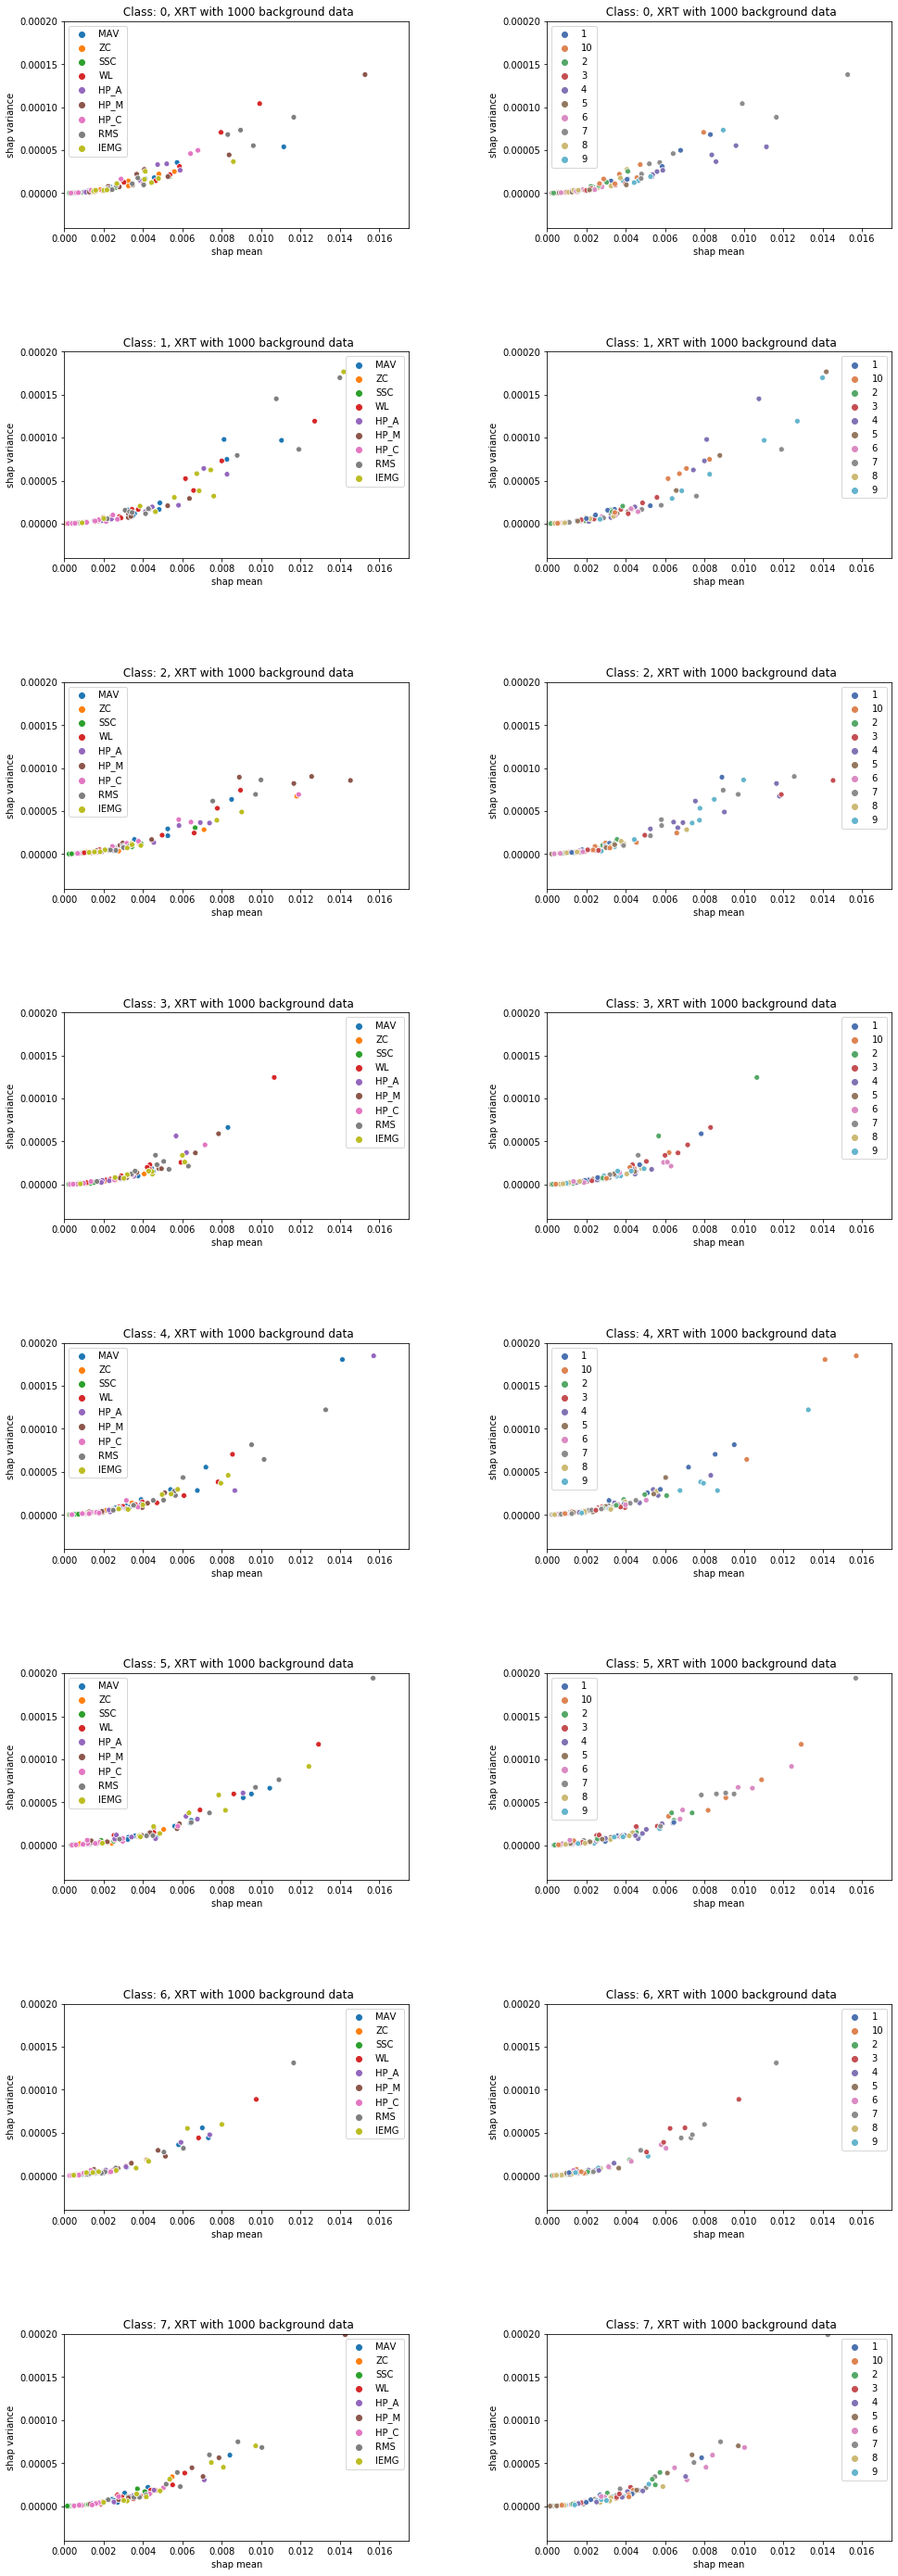

In [44]:
heigth=8;
width=2;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    sns.scatterplot(x=shap_mean_bg.iloc[i], y=((shap_variance_bg.iloc[i])), hue=feature, legend="full", ax=axes[i,0])
    axes[i,0].set(ylim=(-0.00004, 0.0002))
    axes[i,0].set(xlim=(0,0.0175))
    axes[i,0].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,0].set(title=" Class: {}, XRT with 1000 background data".format(i))
    
    sns.scatterplot(x=shap_mean_bg.iloc[i], y=((shap_variance_bg.iloc[i])), hue=channel, legend="full", ax=axes[i,1], palette="deep")
    axes[i,1].set(ylim=(-0.00004, 0.0002))
    axes[i,1].set(xlim=(0,0.0175))
    axes[i,1].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,1].set(title=" Class: {}, XRT with 1000 background data".format(i))


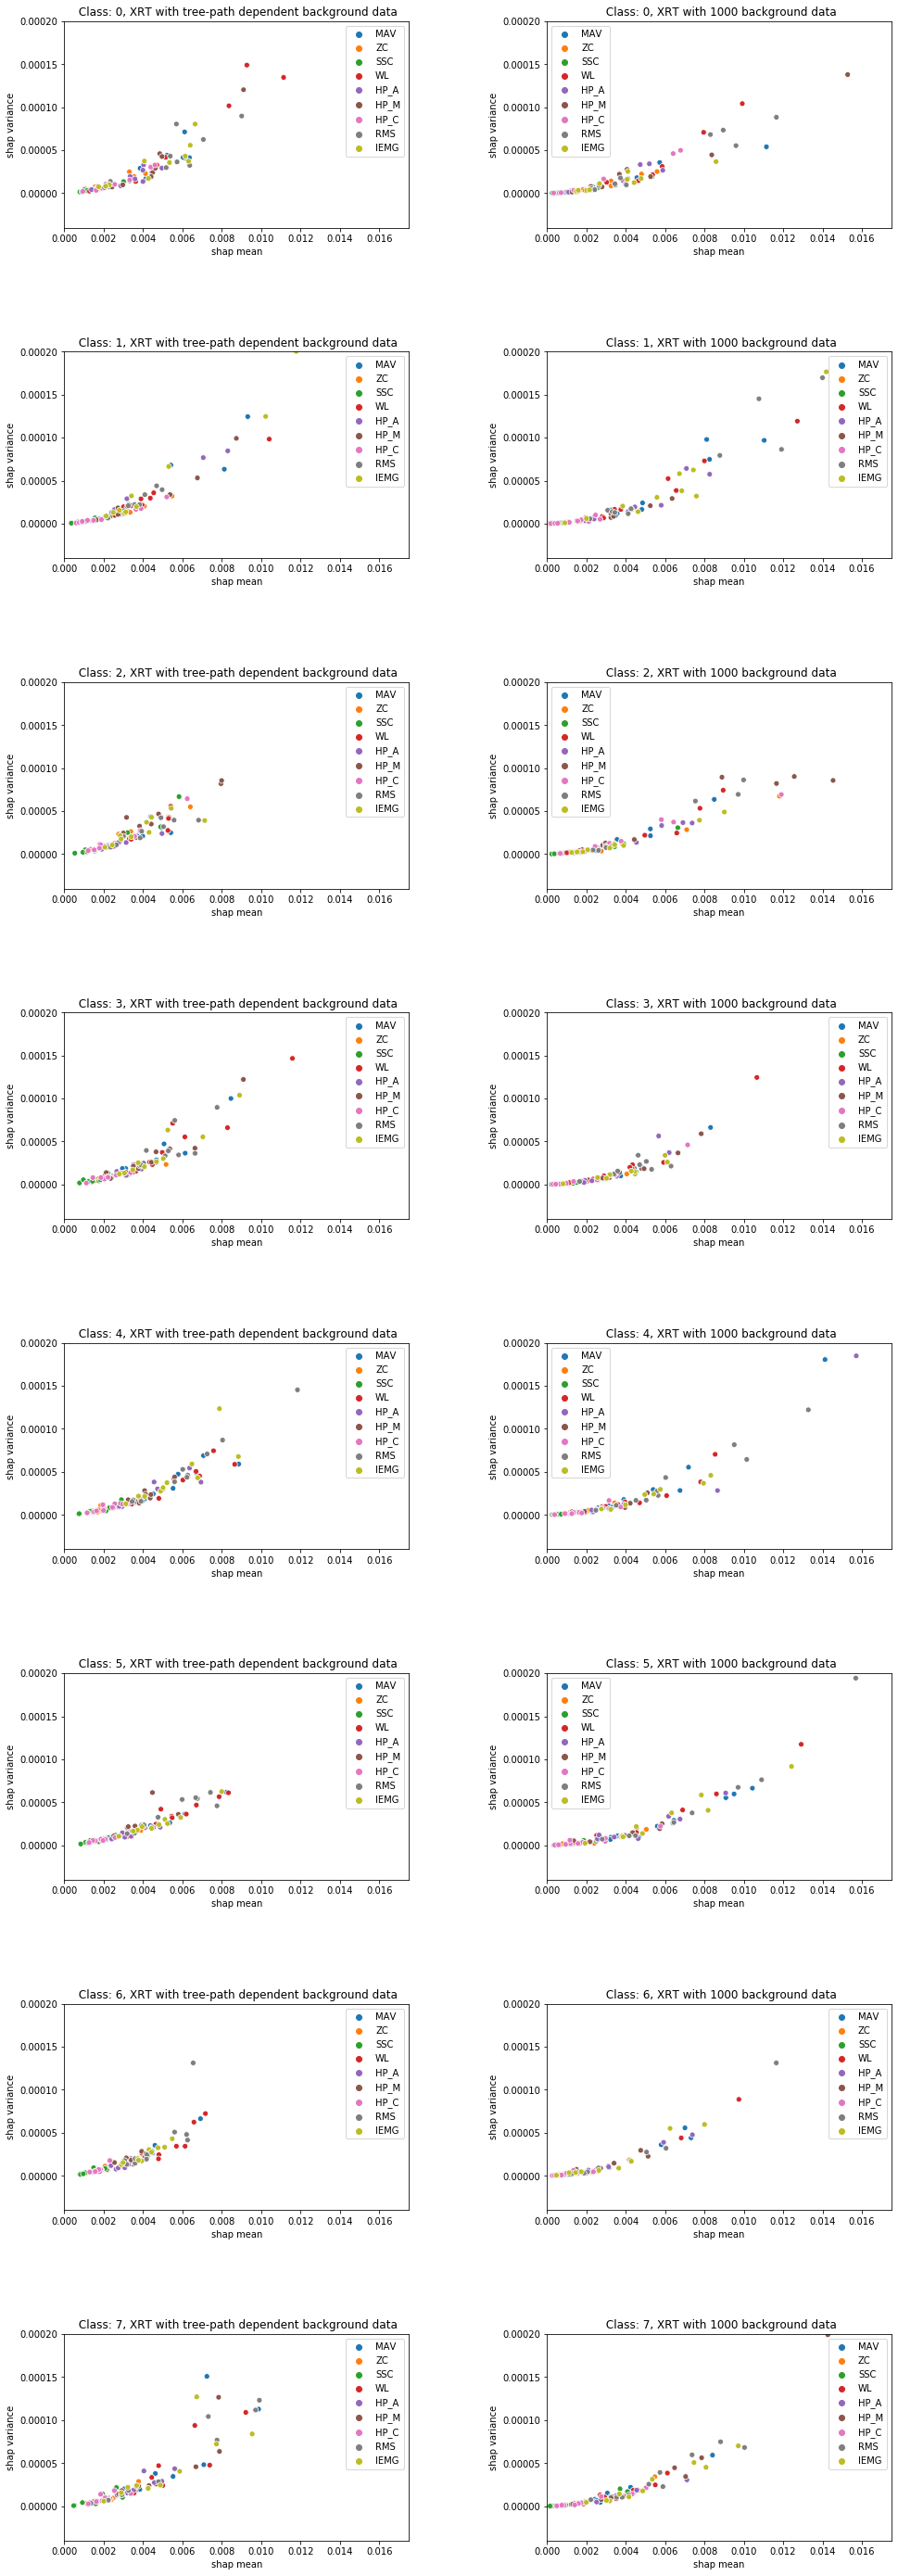

In [45]:
heigth=8;
width=2;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    sns.scatterplot(x=shap_mean.iloc[i], y=((shap_variance.iloc[i])), hue=feature, legend="full", ax=axes[i,0])
    axes[i,0].set(ylim=(-0.00004, 0.0002))
    axes[i,0].set(xlim=(0,0.0175))
    axes[i,0].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,0].set(title=" Class: {}, XRT with tree-path dependent background data".format(i))
    
    sns.scatterplot(x=shap_mean_bg.iloc[i], y=((shap_variance_bg.iloc[i])), hue=feature, legend="full", ax=axes[i,1])
    axes[i,1].set(ylim=(-0.00004, 0.0002))
    axes[i,1].set(xlim=(0,0.0175))
    axes[i,1].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,1].set(title=" Class: {}, XRT with 1000 background data".format(i))


# LDA

In [47]:
num_pat=11
shap_LDA=[]

for patient in range(num_pat):
    file_path = root_path+'resources/SHAP/SHAP_LDA/shap_LDA_patient_{}_tmp.pkl'.format(patient)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    print(len(shap_values))
    print(shap_values[0].head())
    print(shap_values[0].shape)

    shap_LDA.append(shap_values)

8
       MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0  0.029492  0.011303  0.000000  0.000000  0.003997 -0.004783  0.011245   
1 -0.089665 -0.025082  0.000000 -0.028467  0.015852  0.000000 -0.047884   
2  0.026499  0.010654 -0.003598  0.003340 -0.003830  0.000000  0.009857   
3 -0.042154  0.015426  0.011987  0.004548 -0.001872 -0.001825  0.000000   
4 -0.071060 -0.033962  0.000000  0.000000 -0.015938  0.000000 -0.040786   

       MAV8    MAV9     MAV10  ...     IEMG1     IEMG2     IEMG3     IEMG4  \
0  0.029426  0.0000  0.011457  ...  0.029942  0.008400 -0.005721  0.000000   
1  0.000000  0.0000 -0.023893  ... -0.073293 -0.037665  0.000000  0.000000   
2  0.012805  0.0000  0.011384  ...  0.028323  0.011373 -0.005547  0.000000   
3  0.011749 -0.0056  0.011310  ... -0.038681 -0.005481  0.010316  0.006669   
4  0.000000  0.0000  0.000000  ... -0.098286 -0.020664  0.000000  0.000000   

      IEMG5     IEMG6     IEMG7     IEMG8     IEMG9    IEMG10  
0  0.006063 -0

       MAV1      MAV2      MAV3      MAV4  MAV5      MAV6      MAV7      MAV8  \
0  0.015893 -0.050171 -0.005369  0.000000   0.0  0.004424 -0.008305  0.000000   
1  0.009525 -0.048352  0.000000  0.000000   0.0  0.000000 -0.005656  0.000000   
2  0.011929 -0.042776  0.000000  0.000000   0.0  0.008833 -0.010848  0.000000   
3  0.006771 -0.046805 -0.002585 -0.001715   0.0 -0.011898 -0.005145 -0.005499   
4  0.004933 -0.046676 -0.012204  0.003796   0.0  0.006400 -0.016434  0.000000   

       MAV9     MAV10  ...     IEMG1     IEMG2     IEMG3     IEMG4     IEMG5  \
0 -0.009719 -0.032993  ... -0.003217 -0.059263 -0.005024 -0.005438 -0.002960   
1  0.011050  0.031141  ...  0.009938 -0.041564  0.000000  0.000000  0.018375   
2  0.003523  0.022218  ...  0.014287 -0.039234  0.000000  0.000000  0.000000   
3  0.000000  0.000000  ...  0.004922 -0.043098 -0.003412 -0.009873  0.000000   
4  0.000000  0.030228  ...  0.007789 -0.050975  0.000000 -0.004474  0.004368   

      IEMG6     IEMG7     IEMG8 

In [48]:
shap_mean_LDA=pd.DataFrame(columns=shap_values[0].columns.values)
shap_variance_LDA=pd.DataFrame(columns=shap_values[0].columns.values)
for i in range(8):
    shap_tmp=pd.DataFrame(columns=shap_values[0].columns.values)

    for pat in range(num_pat):
        shap_tmp=pd.concat([shap_tmp, shap_LDA[pat][i].abs()], axis=0)

    shap_mean_LDA.loc[i]=shap_tmp.mean(axis=0)
    shap_variance_LDA.loc[i]=shap_tmp.var(axis=0)
    #shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
        #tmp=shap_values[i].abs()
        #shap_mean.loc[i]=tmp.mean(axis=0)
        #shap_variance.loc[i]=tmp.var(axis=0)
    #shap_means.append((shap_mean))
    #shap_variances.append(shap_variance)
shap_mean_LDA

,MAV1,MAV2,MAV3,MAV4,MAV5,MAV6,MAV7,MAV8,MAV9,MAV10,...,IEMG1,IEMG2,IEMG3,IEMG4,IEMG5,IEMG6,IEMG7,IEMG8,IEMG9,IEMG10
0,0.017749,0.017997,0.004741,0.004884,0.005566,0.006807,0.019175,0.005316,0.007522,0.012153,...,0.017783,0.017998,0.004784,0.004834,0.005560,0.006806,0.019148,0.005343,0.007478,0.012083
1,0.005981,0.004069,0.008653,0.017713,0.011025,0.005921,0.005744,0.007468,0.022947,0.009289,...,0.006038,0.004071,0.008656,0.017686,0.011060,0.005921,0.005716,0.007441,0.022887,0.009284
2,0.008815,0.012184,0.012919,0.009723,0.011336,0.008388,0.014714,0.009744,0.008754,0.014402,...,0.008905,0.012205,0.012879,0.009743,0.011358,0.008337,0.014782,0.009746,0.008805,0.014449
3,0.013262,0.024117,0.006700,0.009554,0.017252,0.011994,0.011620,0.009224,0.012996,0.009733,...,0.013187,0.024147,0.006658,0.009545,0.017218,0.011941,0.011637,0.009242,0.012988,0.009679
4,0.013292,0.010895,0.011873,0.013656,0.020355,0.012549,0.017077,0.010770,0.033636,0.019053,...,0.013259,0.010919,0.011947,0.013681,0.020311,0.012566,0.017055,0.010714,0.033683,0.019067
5,0.014292,0.009520,0.007941,0.018193,0.012313,0.009969,0.012386,0.016989,0.012411,0.012802,...,0.014286,0.009522,0.007887,0.018149,0.012250,0.009982,0.012435,0.016948,0.012435,0.012780
6,0.020012,0.010143,0.008096,0.015780,0.013976,0.013354,0.011367,0.012075,0.011606,0.008625,...,0.019983,0.010184,0.008131,0.015774,0.014006,0.013405,0.011351,0.012048,0.011602,0.008612
7,0.010188,0.009568,0.008787,0.011103,0.008770,0.027693,0.031715,0.009460,0.006784,0.006748,...,0.010180,0.009560,0.008811,0.011084,0.008811,0.027654,0.031703,0.009502,0.006833,0.006788


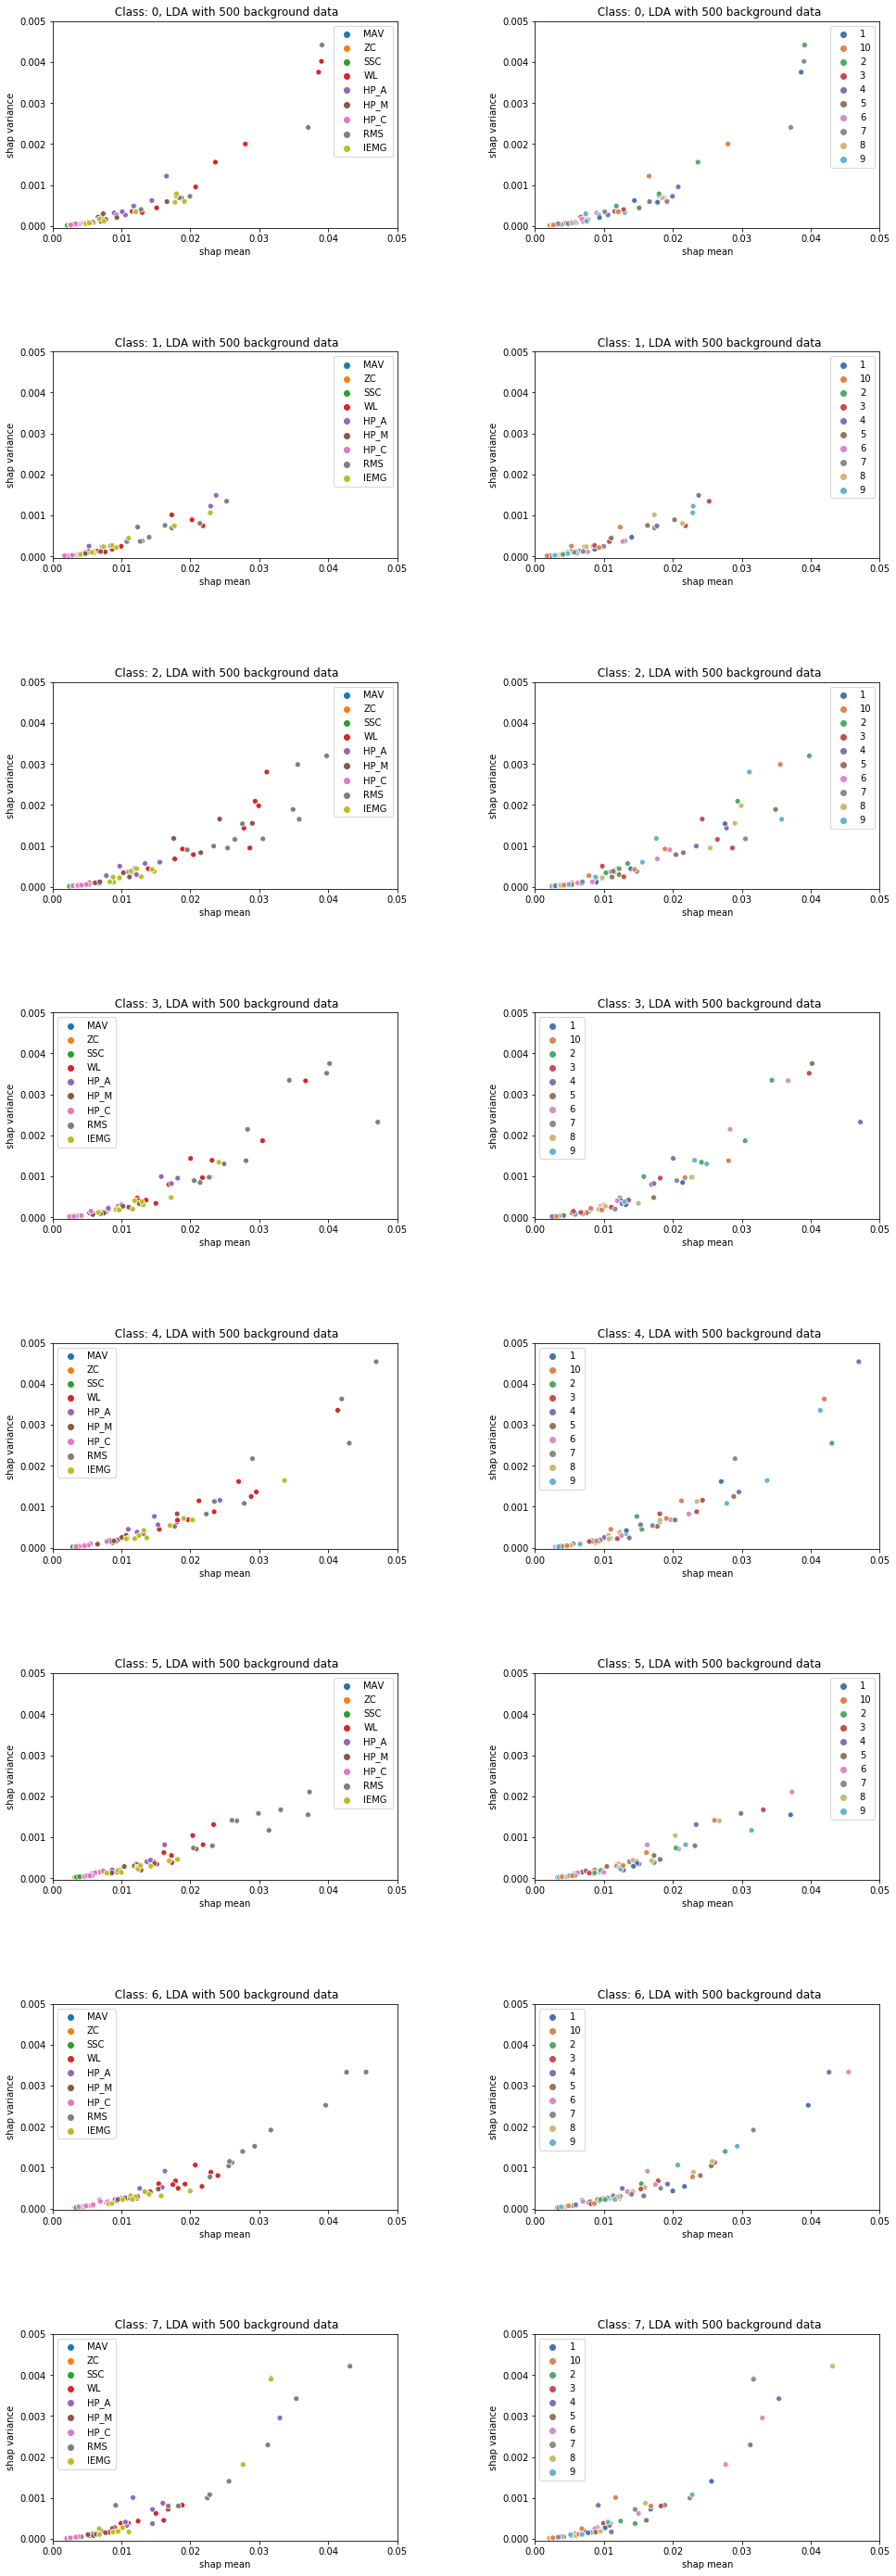

In [55]:
heigth=8;
width=2;
f, axes = plt.subplots(heigth, width,figsize=(16, 50))
f.subplots_adjust(hspace=0.6, wspace=0.4)
for i in range(8):
    sns.scatterplot(x=shap_mean_LDA.iloc[i], y=((shap_variance_LDA.iloc[i])), hue=feature, legend="full", ax=axes[i,0])
    axes[i,0].set(ylim=(-0.00004, 0.005))
    axes[i,0].set(xlim=(0,0.05))
    axes[i,0].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,0].set(title=" Class: {}, LDA with 500 background data".format(i))
    
    sns.scatterplot(x=shap_mean_LDA.iloc[i], y=((shap_variance_LDA.iloc[i])), hue=channel, legend="full", ax=axes[i,1], palette="deep")
    axes[i,1].set(ylim=(-0.00004, 0.005))
    axes[i,1].set(xlim=(0,0.05))
    axes[i,1].set(xlabel='shap mean', ylabel='shap variance')
    axes[i,1].set(title=" Class: {}, LDA with 500 background data".format(i))


# PROVE


In [5]:
num_pat=11
shap_LDA=[]
shap_means_patients=[]
for pat in range(num_pat):
    file_path = 'C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(pat)
    with open(file_path, 'rb') as f:
        shap_values = pickle.load(f)
    shap_LDA.append(shap_values)

    #print(len(shap_values))
    #print(shap_values[0])
    #plt.figure()
    #plt.imshow(shap_values[0], cmap='jet', aspect='auto', alpha=0.5)
    #plt.show()
    shap_mean=pd.DataFrame(columns=shap_values[0].columns.values)
    for i in range(8):
        tmp=shap_values[i].abs()
        shap_mean.loc[i]=tmp.mean(axis=0)
    shap_means_patients.append((shap_mean))

In [6]:
class_0=[]
for patient in range(num_pat):
    id_max_tot=shap_means_patients[patient].mean(axis=0).argmax()
    print("tot patient", patient, ":", id_max_tot, shap_means_patients[patient].columns[id_max_tot])
    
    for index in range(8):
        id_max=shap_means_patients[patient].iloc[index,:].argmax()
        
        print(index, ":",  shap_means_patients[patient].columns[id_max], id_max, "max", np.max(shap_means_patients[patient].iloc[index,:]))

class_0=["HP_M1", "RMS7", "WL1", "WL2", "RMS10", "MAV4", "WL7"]

tot patient 0 : 76 RMS7
0 : HP_M1 50 max 0.01768661355762631
1 : RMS9 78 max 0.013874768217138699
2 : HP_M8 57 max 0.01593280292314432
3 : MAV2 1 max 0.01699750583134554
4 : WL10 39 max 0.016854364323343567
5 : HP_M7 56 max 0.018308397699624647
6 : RMS7 76 max 0.013075481179662882
7 : HP_M7 56 max 0.018508700148581077
tot patient 1 : 53 HP_M4
0 : RMS7 76 max 0.017391100432676464
1 : HP_M4 53 max 0.01623234230218717
2 : HP_M2 51 max 0.014664165472705201
3 : HP_M1 50 max 0.018598242683208612
4 : HP_M4 53 max 0.01666884408386924
5 : IEMG6 85 max 0.013786117344210057
6 : RMS9 78 max 0.012380191997116995
7 : HP_M7 56 max 0.018775973296981042
tot patient 2 : 77 RMS8
0 : WL1 30 max 0.01496984009399963
1 : WL4 33 max 0.02253981151170522
2 : HP_M3 52 max 0.012755274978181784
3 : WL4 33 max 0.014534411839627278
4 : WL4 33 max 0.011091913528426778
5 : WL3 32 max 0.010142621565641281
6 : HP_M3 52 max 0.011694218154064776
7 : RMS8 77 max 0.024656579885459034
tot patient 3 : 85 IEMG6
0 : HP_M1 50 ma

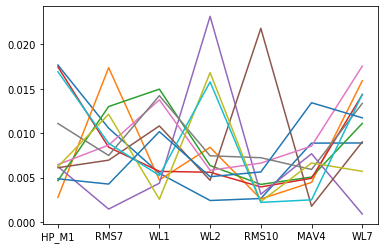

In [7]:
plt.figure()
for patient in range(num_pat):
    
    vect=shap_means_patients[patient].loc[0,class_0]
    plt.plot(vect)
plt.show()

<class 'list'>
8
[[-6.18876259e-03  1.07851479e-03 -1.21089646e-03 ... -5.15738002e-04
  -5.35010050e-03 -2.22030426e-03]
 [ 1.38750252e-03  1.38811997e-03  4.13515556e-04 ... -2.28159039e-03
  -1.72022967e-03  3.92693063e-03]
 [-3.41282275e-03 -1.71721428e-03 -3.85663273e-04 ... -7.12032306e-04
   9.68078610e-04 -1.98760116e-03]
 ...
 [-6.23139202e-05  9.22198066e-04  5.86958540e-04 ... -1.89411013e-03
  -3.87029547e-05 -2.93501314e-03]
 [ 3.63330197e-03 -3.22779272e-03 -6.03517532e-04 ...  5.71845182e-04
  -6.01718170e-03 -1.07583894e-02]
 [-9.97412095e-04 -1.22493610e-03  9.04256734e-04 ...  1.23328866e-03
   4.75907587e-03 -5.30156879e-03]]


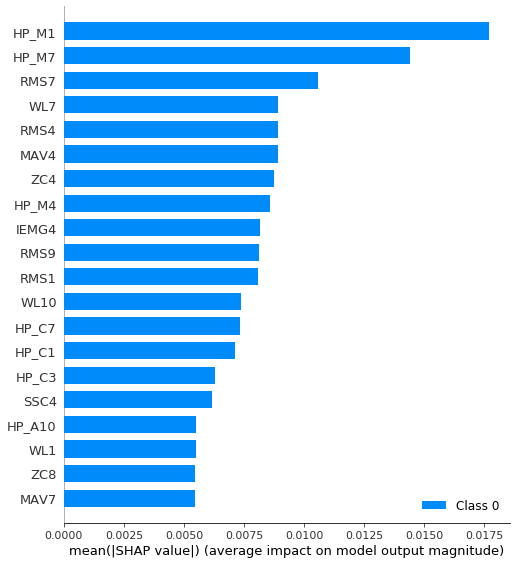

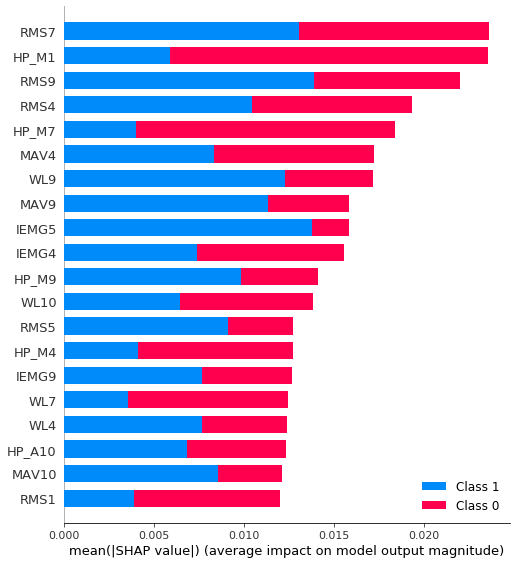

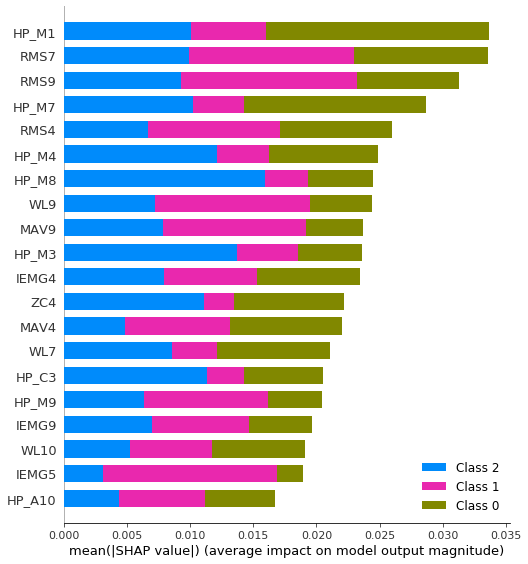

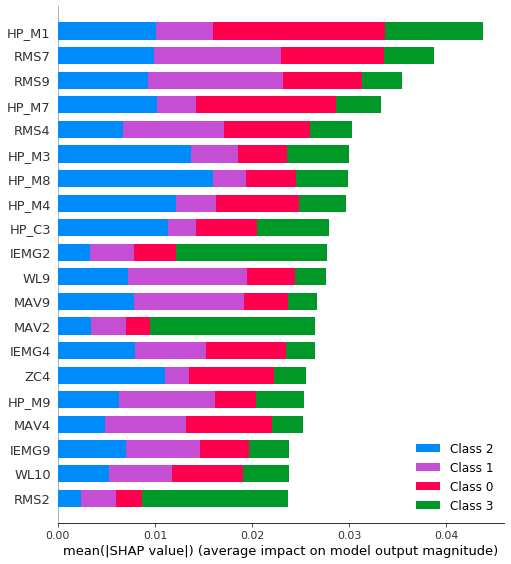

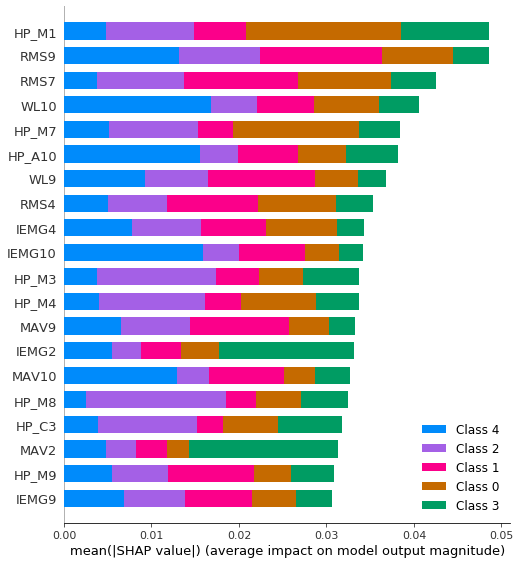

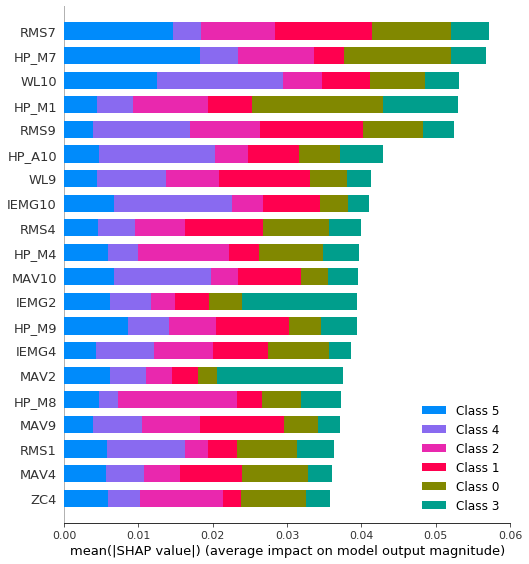

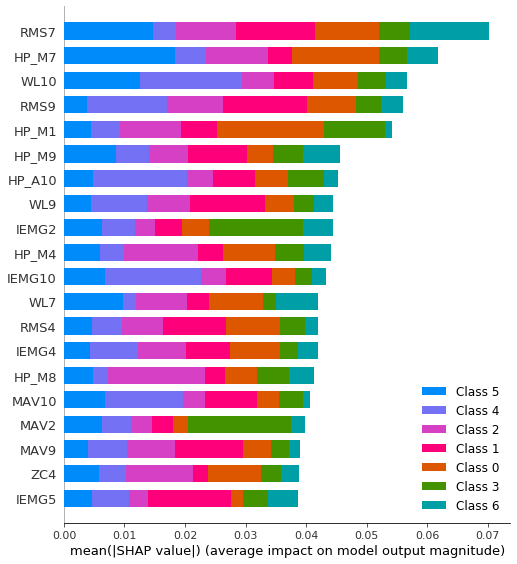

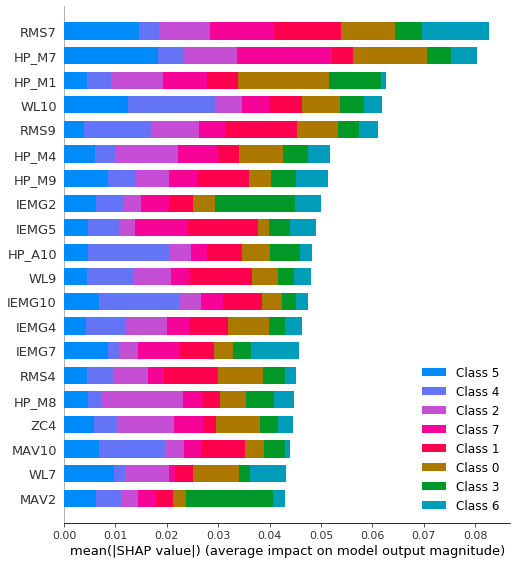

In [130]:
num_pat=11
shap_LDA=[]
shap_means_patients=[]
file_path = 'C:\\Users\\noemi\\Desktop\\university\\university\\tesi\\Thesis-XAI\\resources\\shap_ExtremelyRandomizedTrees_patient_{}_tmp.pkl'.format(0)
with open(file_path, 'rb') as f:
    shap_values = pickle.load(f)

print(type(shap_values))
print(len(shap_values))
print((shap_values[0].values))
shap_list=[]
for index in range(8):
    shap_list.append(shap_values[index].values)
    plt.figure()
    shap.summary_plot(shap_list, X_test[patient], plot_type="bar", show=False)

In [38]:
shap_means_patients[patient].sum(axis=0).argmax()

41

<function matplotlib.pyplot.show(*args, **kw)>

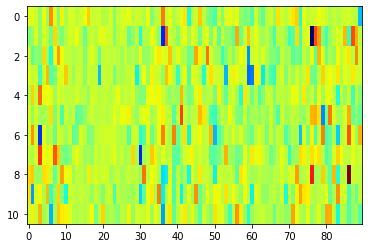

In [86]:
class_0=np.zeros([11,90])
for patient in range(num_pat):
    class_0[patient,:]=shap_means_patients[patient].iloc[0,:]

plt.figure()
plt.imshow(class_0, cmap='jet', aspect='auto')
plt.show

In [ ]:
class_1=np.zeros([11,90])
for patient in range(num_pat):
    class_1[patient,:]=shap_means_patients[patient].iloc[1,:]

plt.figure()
plt.imshow(class_1, cmap='jet', aspect='auto')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

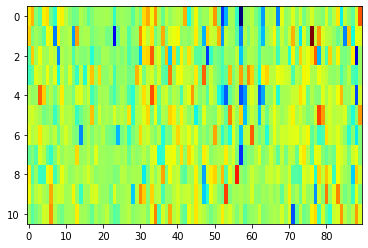

In [88]:
class_2=np.zeros([11,90])
for patient in range(num_pat):
    class_2[patient,:]=shap_means_patients[patient].iloc[2,:]

plt.figure()
plt.imshow(class_2, cmap='jet', aspect='auto')
plt.show

In [46]:
(shap_means_patients[0].iloc[0,:])

MAV1     -0.006286
MAV2     -0.004402
MAV3      0.000213
MAV4      0.002916
MAV5      0.000026
            ...   
IEMG6     0.001863
IEMG7    -0.005318
IEMG8     0.004237
IEMG9    -0.000004
IEMG10   -0.000790
Name: 0, Length: 90, dtype: float64

In [49]:
type(shap_means_patients[0].iloc[0,:])

pandas.core.series.Series

In [56]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[1].iloc[0,:].values)


0.0002965231899832905

In [57]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[0].iloc[1,:].values)


-0.0003094538292026214

In [58]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[0].iloc[2,:].values)


0.0007606402871822023

In [59]:
np.mean(shap_means_patients[0].iloc[0,:].values-shap_means_patients[2].iloc[0,:].values)


-0.00014835870953122313

In [15]:
num_pat=11
shap_extratrees=[]
shap_means=[]
shap_variances=[]

file_path = 'C:/Users/noemi/Desktop/university/university/tesi/Thesis-XAI/resources/SHAP/shap_ExtremelyRandomizedTrees_patient_0_tmp.pkl'
with open(file_path, 'rb') as f:
    shap_values = pickle.load(f)

print((shap_values[0]))

          MAV1      MAV2      MAV3      MAV4      MAV5      MAV6      MAV7  \
0    -0.006189  0.001079 -0.001211  0.000948 -0.000648  0.000411 -0.001374   
1     0.001388  0.001388  0.000414 -0.009407  0.002074 -0.002512  0.006605   
2    -0.003413 -0.001717 -0.000386 -0.004012  0.000098 -0.000809  0.001305   
3    -0.001775 -0.001113 -0.000119 -0.005411  0.000110 -0.000445 -0.002529   
4     0.001055 -0.000863 -0.000764 -0.006001  0.000179 -0.000484 -0.001934   
...        ...       ...       ...       ...       ...       ...       ...   
3292  0.007377  0.001487  0.003872 -0.004331  0.000613  0.004456  0.001718   
3293  0.000564  0.000446  0.002865 -0.004291 -0.000023  0.000638 -0.002991   
3294 -0.000062  0.000922  0.000587 -0.004181  0.000711 -0.002835  0.004872   
3295  0.003633 -0.003228 -0.000604 -0.012912 -0.001438 -0.000599  0.004341   
3296 -0.000997 -0.001225  0.000904  0.011802  0.000898 -0.001306 -0.009173   

          MAV8      MAV9     MAV10  ...     IEMG1     IEMG2    